## Driver Drowsiness Prediction
 In this project, we are trying to predict whether the driver is feeling drowsy or not with the help of machine learning model. Using CNN and a pre trained model we aim to predit accurate estimates of driver drowsiness beased on testing images.

## Dataset
The Drowsiness Dataset available on Kaggle is a collection of images that aims to aid in the development of driver drowsiness detection models using deep learning techniques. 
The images were taken in various lighting conditions and features yawning or no yawning and shut or open eyes images, providing a diverse range of data to train and test models. The dataset consists of a total of 2900 images and is divided into labled images of 726, 726, 725 and 723 images in each folder.

https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset


## Problem Statement

Driver drowsiness is a significant cause of vehicular accidents that can lead to devastating consequences in terms of loss of life and property damage. Despite the presence of various remedies to combat this issue, there is an urgent requirement for more efficacious and proficient methods to detect driver drowsiness promptly. To address this challenge, this project endeavors to develop a deep learning model utilizing the Keras framework to discern driver drowsiness in Images. The model will be trained on a meticulously labeled dataset comprising images categorized as Yawn or no-yawn and Closed or Open Eyes. With Images as input, the model will accurately classify them as drowsy or non-drowsy. The project's primary objective is to achieve high precision and real-time performance, allowing for timely detection of drowsiness and alerting the driver to avoid accidents.

## Importing Neccessary Libraries

In [48]:
import numpy as np 
import pandas as pd 
import os
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [4]:
labels = os.listdir("/Users/garvbalotia/Desktop/Project2/train")

Defined labels 

In [5]:
labels

['Closed', 'no_yawn', 'yawn', 'Open']

Checking some images in the dataset

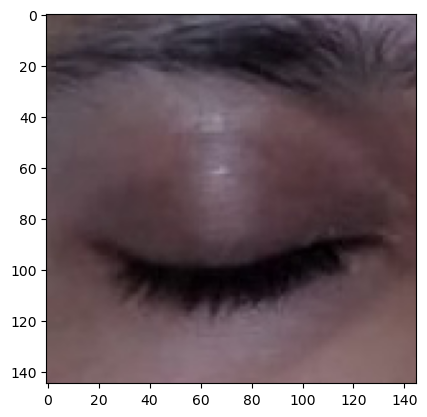

In [6]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/Users/garvbalotia/Desktop/Project2/train/Closed/_0.jpg"))

In [7]:
a = plt.imread("/Users/garvbalotia/Desktop/Project2/train/yawn/10.jpg")

In [8]:
a.shape

(480, 640, 3)

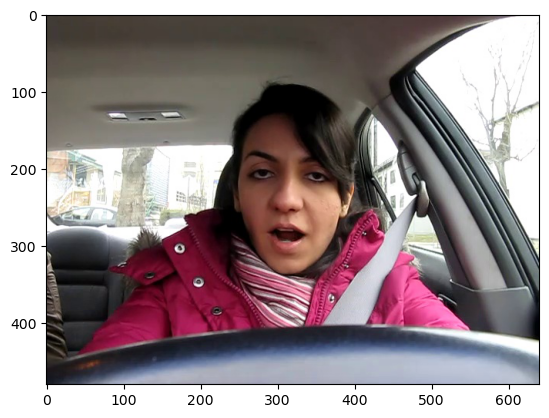

In [9]:
plt.imshow(plt.imread("/Users/garvbalotia/Desktop/Project2/train/yawn/10.jpg"))

## Building function to label Yawn and No Yawn Images

With the help of Adaboost Face detector we classify the images based on the labels 'yawn' and 'no_yawn'.

In [10]:
def face_for_yawn(direc="/Users/garvbalotia/Desktop/Project2/train", face_cas_path="/Users/garvbalotia/Desktop/Project2/archive/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [38]:
yawn_no_yawn

[[array([[[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0],
          ...,
          [  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0]],
  
         [[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0],
          ...,
          [  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0]],
  
         [[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0],
          ...,
          [  1, 248,   3],
          [  1, 252,   1],
          [  0, 255,   0]],
  
         ...,
  
         [[  0, 255,   0],
          [  0, 255,   0],
          [  1, 247,   2],
          ...,
          [ 32,  33,  67],
          [ 13, 161,  28],
          [  0, 255,   0]],
  
         [[  0, 255,   0],
          [  0, 255,   0],
          [  0, 252,   1],
          ...,
          [ 13, 161,  28],
          [  6, 215,  12],
          [  0, 255,   0]],
  
         [[  0, 255,   0],
          [  0, 255,   0],
          [  0, 255,   0

## Building function to label shut and open eyes

With the help of Adaboost Face detector we classify the images based on the labels 'closed' and 'open'.

In [11]:
def get_data(dir_path="/Users/garvbalotia/Desktop/Project2/train", face_cas="Users/garvbalotia/Desktop/Project2/archive/haarcascade_frontalface_default.xml", eye_cas="Users/garvbalotia/Desktop/Project2/archive/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [12]:
data_train = get_data()

2
3


In [36]:
data_train

[[array([[[ 43,  54,  70],
          [ 30,  43,  57],
          [ 50,  63,  75],
          ...,
          [170, 193, 225],
          [170, 193, 225],
          [168, 191, 223]],
  
         [[ 40,  50,  67],
          [ 36,  49,  63],
          [ 52,  66,  78],
          ...,
          [169, 194, 228],
          [171, 196, 230],
          [169, 194, 228]],
  
         [[ 36,  46,  63],
          [ 40,  53,  67],
          [ 51,  65,  78],
          ...,
          [165, 192, 226],
          [167, 194, 228],
          [166, 193, 227]],
  
         ...,
  
         [[112, 147, 190],
          [110, 145, 188],
          [109, 143, 186],
          ...,
          [137, 170, 215],
          [135, 168, 213],
          [133, 166, 211]],
  
         [[109, 144, 187],
          [109, 144, 187],
          [111, 146, 189],
          ...,
          [137, 170, 215],
          [136, 169, 214],
          [135, 168, 213]],
  
         [[110, 145, 189],
          [116, 151, 195],
          [124, 159, 203

In [13]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [14]:
new_data = append_data()

0
1
2
3


/var/folders/3b/59_t9s2d6w5b914qqkywd73m0000gn/T/ipykernel_33349/2804427426.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [37]:
new_data

array([[array([[[  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0],
                ...,
                [  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0]],

               [[  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0],
                ...,
                [  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0]],

               [[  0, 255,   0],
                [  0, 255,   0],
                [  0, 255,   0],
                ...,
                [  1, 248,   3],
                [  1, 252,   1],
                [  0, 255,   0]],

               ...,

               [[  0, 255,   0],
                [  0, 255,   0],
                [  1, 247,   2],
                ...,
                [ 32,  33,  67],
                [ 13, 161,  28],
                [  0, 255,   0]],

               [[  0, 255,   0],
                [  0, 255,   0],
                [  0, 252,   

In [15]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [16]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [34]:
X

array([[[[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  1, 248,   3],
         [  1, 252,   1],
         [  0, 255,   0]],

        ...,

        [[  0, 255,   0],
         [  0, 255,   0],
         [  1, 247,   2],
         ...,
         [ 32,  33,  67],
         [ 13, 161,  28],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 252,   1],
         ...,
         [ 13, 161,  28],
         [  6, 215,  12],
         [  0, 255,   0]],

        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
        

In [35]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## Train Test Split

In [76]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [77]:
y = np.array(y)

Using a Split ratio of 70:30

In [78]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [79]:
len(X_test)

578

## Building the Model

In [80]:
tf.__version__

'2.11.0'

In [81]:
import keras
keras.__version__

'2.10.0'

Using ImageDataGenerator to perform real-time data augmentation. This helps increase data variability and also saves memory

In [82]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [83]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

## Model Training

In [84]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50


2023-04-05 18:25:47.170849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 1.2714 - accuracy: 0.4172

2023-04-05 18:26:00.180855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 15s 325ms/step - loss: 1.2714 - accuracy: 0.4172 - val_loss: 1.0953 - val_accuracy: 0.4118
Epoch 2/50
43/43 [==============================] - 13s 308ms/step - loss: 0.5540 - accuracy: 0.7676 - val_loss: 0.4888 - val_accuracy: 0.7958
Epoch 3/50
43/43 [==============================] - 13s 295ms/step - loss: 0.3652 - accuracy: 0.8560 - val_loss: 0.3399 - val_accuracy: 0.8702
Epoch 4/50
43/43 [==============================] - 13s 292ms/step - loss: 0.2798 - accuracy: 0.8760 - val_loss: 0.3432 - val_accuracy: 0.8599
Epoch 5/50
43/43 [==============================] - 13s 295ms/step - loss: 0.2388 - accuracy: 0.9065 - val_loss: 0.2712 - val_accuracy: 0.8945
Epoch 6/50
43/43 [==============================] - 13s 288ms/step - loss: 0.2120 - accuracy: 0.9117 - val_loss: 0.2565 - val_accuracy: 0.9014
Epoch 7/50
43/43 [==============================] - 13s 291ms/step - loss: 0.2222 - accuracy: 0.9087 - val_loss: 0.2474 - val_accuracy: 0.9083
Epoch 8/50

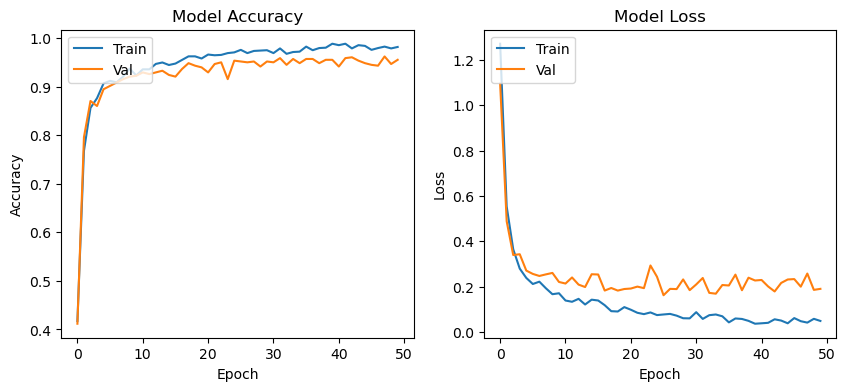

In [89]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 4))

# Plot the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Show the plots
plt.show()

## Training Accuracy and Loss Graphs

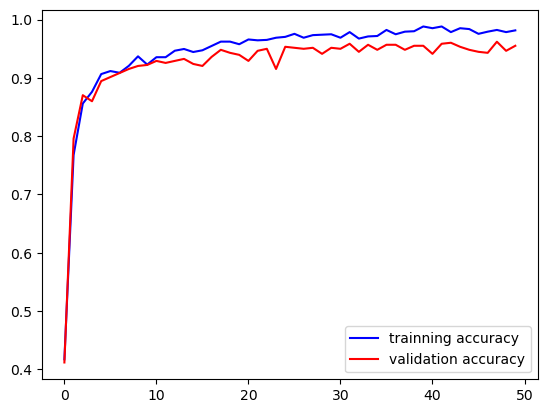

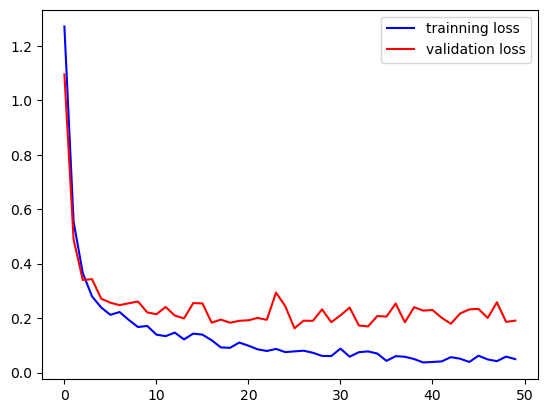

In [98]:
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

## Results

In [103]:
print('Training Accuracy:', history['accuracy'][-1])
print('Validation Accuracy:', history['val_accuracy'][-1])
print('Training Loss:', history['loss'][-1])
print('Validation Loss:', history['val_loss'][-1])

Training Accuracy: 0.9814402461051941
Validation Accuracy: 0.9550173282623291
Training Loss: 0.04910247400403023
Validation Loss: 0.19056732952594757


The Training Accuracy was found to be 98% and Validation Accuracy was found to be 95%.
The Training Loss was found to be 4.9% and the Validation Loss was observed to be 19% 

## Saving the Model

In [100]:
model.save("/Users/garvbalotia/Desktop/Project2/drowiness_new6.h5")

In [101]:
model.save("/Users/garvbalotia/Desktop/Project2/drowiness_new6.model")

INFO:tensorflow:Assets written to: /Users/garvbalotia/Desktop/Project2/drowiness_new6.model/assets


INFO:tensorflow:Assets written to: /Users/garvbalotia/Desktop/Project2/drowiness_new6.model/assets


## Loading the Model

In [72]:
model = keras.models.load_model("/Users/garvbalotia/Desktop/Project2/drowiness_new6.model")

In [73]:
predictions = np.argmax(model.predict(X_test), axis=-1)

 1/19 [>.............................] - ETA: 2s

2023-04-05 18:25:04.668004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 3s 160ms/step


In [29]:
predictions

array([3, 3, 2, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 0, 0, 3, 3, 3,
       2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 2,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 2, 1, 3, 1, 3, 2, 1, 3, 2, 2, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 0, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       2, 3, 1, 2, 3, 2, 2, 1, 2, 2, 2, 0, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3,
       3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 0, 2, 3, 1, 2, 1, 3, 2, 3, 1, 2, 0, 1, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1,
       1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 1, 0, 3, 3, 1, 2, 3, 0, 3, 3, 0, 1,
       1, 1, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 2, 1, 3, 3, 2, 2,
       3, 3, 2, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 3, 1,

## Classification Report

In [30]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [31]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), predictions, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.84      0.59      0.69        63
     no_yawn       0.72      0.88      0.79        74
      Closed       0.95      0.98      0.97       215
        Open       0.98      0.96      0.97       226

    accuracy                           0.92       578
   macro avg       0.87      0.85      0.86       578
weighted avg       0.92      0.92      0.92       578



## Predicting function

In [32]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="/Users/garvbalotia/Desktop/Project2/archive/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("/Users/garvbalotia/Desktop/Project2/drowiness_new6.h5")

## Predictions
0 = Yawn,
1 = No Yawn,
2 = Closed,
3 = Open

1/1 [==============================] - 0s 18ms/step
1 no_yawn


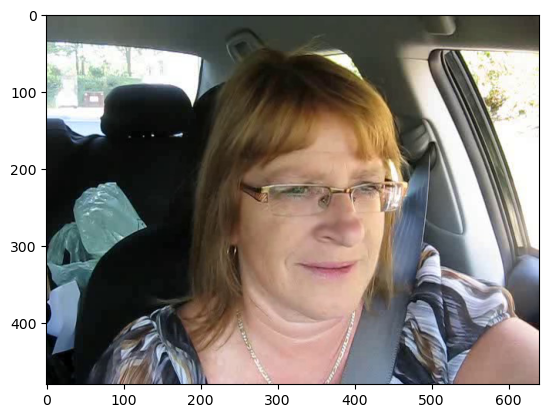

In [43]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("/Users/garvbalotia/Desktop/Project2/train/no_yawn/1067.jpg")])
plt.imshow(plt.imread("/Users/garvbalotia/Desktop/Project2/train/no_yawn/1067.jpg"))
pred = np.argmax(prediction)
print(pred, labels_new[pred])

1/1 [==============================] - 0s 18ms/step
2 Closed


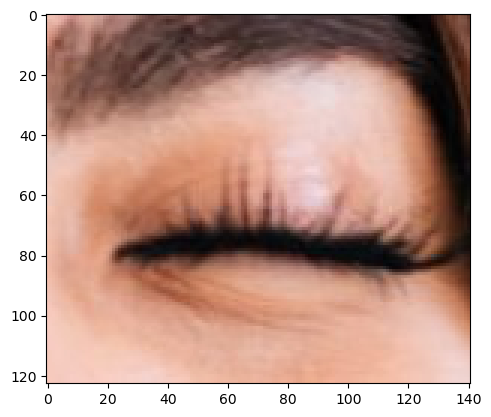

In [44]:
prediction = model.predict([prepare("/Users/garvbalotia/Desktop/Project2/train/Closed/_101.jpg")])
plt.imshow(plt.imread("/Users/garvbalotia/Desktop/Project2/train/Closed/_101.jpg"))
pred = np.argmax(prediction)
print(pred, labels_new[pred])

1/1 [==============================] - 0s 13ms/step
3 Open


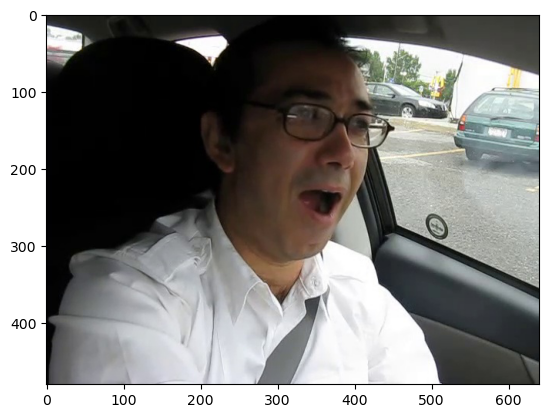

In [46]:
prediction = model.predict([prepare("/Users/garvbalotia/Desktop/Project2/train/yawn/113.jpg")])
plt.imshow(plt.imread("/Users/garvbalotia/Desktop/Project2/train/yawn/113.jpg"))
pred = np.argmax(prediction)
print(pred, labels_new[pred])

1/1 [==============================] - 0s 27ms/step
2 Closed


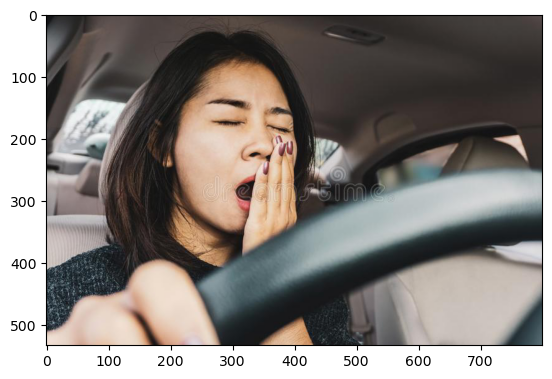

In [47]:
prediction = model.predict([prepare("/Users/garvbalotia/Desktop/tired-sleepy-asian-woman-yawning-driving-car-tired-sleepy-asian-woman-yawning-driving-car-road-163821484.jpg")])
plt.imshow(plt.imread("/Users/garvbalotia/Desktop/tired-sleepy-asian-woman-yawning-driving-car-tired-sleepy-asian-woman-yawning-driving-car-road-163821484.jpg"))
pred = np.argmax(prediction)
print(pred, labels_new[pred])

## Conclusion



Overall the model predicts resonably well whether the person driving is having symptoms of drowsiness. With a training accuracy of 98%, it performs well on images and can also be used in object detection scenarios in dashcam of vehicles.

## Summary

Driver drowsiness is a critical issue that can lead to severe consequences such as road accidents, causing loss of life and property damage. Despite the availability of various solutions, detecting driver drowsiness in real-time is still a pressing need. This project aims to develop a deep learning model using Keras to detect driver drowsiness from driver images. The model will be trained on a labeled dataset of images categorized as drowsy or non-drowsy, and it will classify images as drowsy or non-drowsy. The ultimate goal is to achieve high accuracy and real-time performance, enabling timely detection of drowsiness and alerting the driver to avoid accidents.

## Future Scope

1. Integration with existing driver assistance systems: The deep learning model can be integrated with existing driver assistance systems, such as lane departure warning and adaptive cruise control, to enhance their effectiveness.

2. Real-world testing and validation: The model needs to be tested in real-world scenarios to validate its accuracy and effectiveness. This can involve testing on a large dataset of diverse drivers and road conditions.

3. Multi-modal detection: In addition to video footage, other modalities such as audio, EEG signals, and eye-tracking can also be used to detect driver drowsiness. Combining these modalities can lead to even more accurate and reliable detection.

4. Generalization to other driving contexts: The model can be generalized to other driving contexts, such as driving in adverse weather conditions, to provide a more comprehensive solution to the problem of driver drowsiness.

5. Integration with autonomous driving systems: The model can also be integrated with autonomous driving systems to detect drowsiness in passengers and alert them accordingly.




## References 

1. https://www.kaggle.com/code/shivampal7722/driver-drowsiness
2. https://www.kaggle.com/code/prashant808/drowsiness-detection-using-cnn
